In [150]:
!pip install --qu langgraph langchain_core langchain-google-genai langchain_community
!pip install --qu  tavily-python

In [151]:


from google.colab import userdata

import random
from langchain_core.messages import SystemMessage,AIMessage,HumanMessage,BaseMessage,AnyMessage

In [152]:
gemini_api_key=userdata.get("GOOGLE_API_KEY")
tavily_api_key=userdata.get("TAVILY_API_KEY")

In [153]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm=ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=gemini_api_key)
#result=llm.invoke(messages)
#type(result)

In [154]:
from langchain_community.tools.tavily_search import TavilySearchResults

Tool

In [155]:
def multiply(a:int,b:int)->int:
  """Multiply a and b
  Args:
    a:int
    b:int
  Returns:
    int:a*b
  """
  return a*b




In [156]:
def add (a:int,b:int)->int:
    """Add a and b
    Args:
    a:int
    b:int
    Returns:
    int:a*b
    """
    return a+b

In [157]:

from tavily import TavilyClient

def find(a: str)->str:
  """ Return search results from TavilySearch
  """
  tavily_client = TavilyClient(api_key=tavily_api_key)
  response = tavily_client.search(a)

  return {"response": response}

In [158]:
tools=[multiply,add,find]

In [159]:
llm=ChatGoogleGenerativeAI(model='gemini-1.5-flash', api_key=gemini_api_key)

In [160]:
llm_with_tools=llm.bind_tools(tools)

In [161]:
from langgraph.graph import MessagesState
from langchain_core.messages import SystemMessage,AIMessage,HumanMessage,BaseMessage,AnyMessage
sys_message=[SystemMessage(content="You are a helpful assistant tasked with performing arithmatic on set of inputs")]






In [162]:
def assistant1(state:MessagesState):
  return{ "messages":[llm.invoke(state["messages"][-1:])]}

    #{"messages":[llm_with_tools.invoke([sys_message]+state["messages"])]}

In [163]:
def assistant(state:MessagesState):
  return{"messages":[llm_with_tools.invoke(sys_message + state["messages"])]}
  # Remove extra brackets around sys_message

In [164]:
from langgraph.graph import START,END, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display
from langgraph.checkpoint.memory import MemorySaver



In [165]:
builder=StateGraph(MessagesState)
builder.add_node("assistant", assistant)
builder.add_node("tools",ToolNode(tools))
builder.add_edge(START,"assistant")
builder.add_conditional_edges("assistant",tools_condition)
builder.add_edge("tools", "assistant")
memory =MemorySaver()
react_graph=builder.compile(checkpointer=memory)

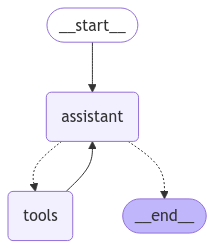

In [166]:
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [167]:
config={
    "configurable":{"thread_id": "1"}
}

In [168]:
messages=[HumanMessage(content="find about Summer Olympic games where these were held last time")]
messages=react_graph.invoke({"messages":messages},config)

for m in messages['messages']:
  m.pretty_print()




================================ Human Message =================================

find about Summer Olympic games where these were held last time
================================== Ai Message ==================================
Tool Calls:
  find (5805006d-07ff-458a-9a78-a40a4ca13cd7)
 Call ID: 5805006d-07ff-458a-9a78-a40a4ca13cd7
  Args:
    a: Summer Olympic games
================================= Tool Message =================================
Name: find

{"response": {"query": "Summer Olympic games", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Summer Olympic Games | Dates, Locations, Facts, & Athletes - Britannica", "url": "https://www.britannica.com/sports/Summer-Olympic-Games", "content": "Learn about the history, evolution, and achievements of the Summer Olympic Games, the international sports event held every four years. Explore the facts, moments, and athletes of each edition from 1896 to 2024.", "score": 0.99746895, "raw_content": null}, {"

In [169]:
#messages=[HumanMessage(content=" add 2 in that and then divide from 4 also tell me about AI")]
#messages=react_graph.invoke({"messages":messages},config)

#for m in messages['messages']:
  #m.pretty_print()


In [170]:
messages=[HumanMessage(content=" find who won volley ball medal of last  games")]
messages=react_graph.invoke({"messages":messages},config)

for m in messages['messages']:
  m.pretty_print()


================================ Human Message =================================

find about Summer Olympic games where these were held last time
================================== Ai Message ==================================
Tool Calls:
  find (5805006d-07ff-458a-9a78-a40a4ca13cd7)
 Call ID: 5805006d-07ff-458a-9a78-a40a4ca13cd7
  Args:
    a: Summer Olympic games
================================= Tool Message =================================
Name: find

{"response": {"query": "Summer Olympic games", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Summer Olympic Games | Dates, Locations, Facts, & Athletes - Britannica", "url": "https://www.britannica.com/sports/Summer-Olympic-Games", "content": "Learn about the history, evolution, and achievements of the Summer Olympic Games, the international sports event held every four years. Explore the facts, moments, and athletes of each edition from 1896 to 2024.", "score": 0.99746895, "raw_content": null}, {"